In [146]:
import warnings
warnings.filterwarnings('ignore')

In [147]:
#%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# formatting Acceptance Rate Table
Accept = pd.DataFrame(pd.read_csv("data/Acceptance.csv"))
# Removing the percent signe
Accept = Accept.drop(["Unnamed: 0", "Unnamed: 0.1"], axis =1)
Accept["Admission Yield"] = [round(float(x.strip("%")),2) for x in Accept["Admission Yield"]]
Accept["Acceptance Rate"] = [round(float(x.strip("%")),2) for x in Accept["Acceptance Rate"]]
Accept["Applicants(x100)"] = [round((x/100),2) for x in Accept["Applicants"]]
Accept["Admitted(x100)"] = [round((x/100),2) for x in Accept["Admitted"]]
Accept["Enrolled(X100)"] = [round((x/100),2) for x in Accept["Enrolled"]]
Accept = Accept[["State", "Applicants(x100)", "Admitted(x100)", "Enrolled(X100)", "Acceptance Rate","Admission Yield"]]
states_average_acceptance = Accept.groupby("State").mean().reset_index()
states_average_acceptance.head()
#index = pd.Index(states_average_acceptance["State"], name='State')

,State,Applicants(x100),Admitted(x100),Enrolled(X100),Acceptance Rate,Admission Yield
0,AK,15.866000,12.446000,6.538000,76.474000,49.310000
1,AL,66.101111,45.073333,11.217037,68.044815,28.190741
2,AR,32.627000,24.172500,8.677500,70.469000,40.225500
3,AZ,99.170588,79.781765,20.401765,77.754706,41.070588
4,CA,122.550500,48.981429,10.589214,62.544500,39.453000


In [148]:
#Formatting Acceptance Table
Accept = pd.DataFrame(pd.read_csv("data/Acceptance.csv"))
Accept.drop(Accept.columns[[0,1]], axis = 1, inplace = True)
for column in Accept.columns[1:-1] :
    try:
        Accept[column] = [round(float(x.strip("$,%")),2) for x in Accept[column]]
    except:
        pass
Average_Acceptance = Accept.loc[Accept['School Name'] == 'Average']
Accept_Avg = Accept.groupby("State").mean().reset_index()       
Accept_Avg.head()

,State,Applicants,Admitted,Enrolled,Acceptance Rate,Admission Yield
0,AK,1586.600000,1244.600000,653.800000,76.474000,49.310000
1,AL,6610.111111,4507.333333,1121.703704,68.044815,28.190741
2,AR,3262.700000,2417.250000,867.750000,70.469000,40.225500
3,AZ,9917.058824,7978.176471,2040.176471,77.754706,41.070588
4,CA,12255.050000,4898.142857,1058.921429,62.544500,39.453000


In [149]:
#Formatting Tuition df
Tuition = pd.DataFrame(pd.read_csv("data/Tuition.csv"))
Tuition = Tuition.drop(0)
Tuition = Tuition.replace('-',0)
Tuition.drop(Tuition.columns[[0,1]], axis = 1, inplace = True)
for column in Tuition.columns[1:-1] :
    Tuition[column] = Tuition[column].str.strip('$, ').str.replace(',','').fillna(0).astype('float')
Avg_Tuition = Tuition.loc[Tuition['School Name'] == 'Average']
Avg_Tuition.head()

,School Name,Tuition & Fees,Tuition & Fees.1,Cost Per Credit Hour,Cost Per Credit Hour.1,Books & Supplies,Living Costs,Living Costs.1,State
89,Average,6550.0,14111.0,216.0,492.0,1440.0,8002.0,7858.0,AL
99,Average,6537.0,14038.0,221.0,564.0,1074.0,9712.0,11752.0,AK
216,Average,4471.0,16113.0,251.0,566.0,1240.0,9457.0,8662.0,AZ
297,Average,4673.0,12235.0,127.0,343.0,2293.0,7830.0,7786.0,AR
919,Average,3006.0,18959.0,46.0,637.0,1698.0,12683.0,13192.0,CA


In [150]:
#Formatting Gradution Table
Graduation = pd.DataFrame(pd.read_csv("data/Graduation.csv"))
Graduation = Graduation.replace('-',0)
Graduation.drop(Graduation.columns[[0,1]], axis = 1, inplace = True)
for column in Graduation.columns[1:-1] :
    Graduation[column] = Graduation[column].str.strip('%').str.replace(',','').fillna(0).astype('float')
Avg_Graduation = Graduation.loc[Graduation['School Name'] == 'Average']
Avg_Graduation.rename(columns = {"School Name": "Average"}, inplace=True)
Graduation.head()
Avg_Graduation.head()

,Average,Graduation Rate,Transfer-out Rate,Transfer-out Rate (BS degree),Retention Rate (Full-time),Retention Rate (Part-time),State
94,Average,38.58,24.00,31.00,63.37,48.11,AL
105,Average,46.13,19.00,25.50,72.56,66.50,AK
230,Average,50.38,14.51,25.33,65.31,48.24,AZ
315,Average,44.88,18.93,33.69,61.59,43.14,AR
983,Average,59.95,10.95,14.87,75.67,56.79,CA


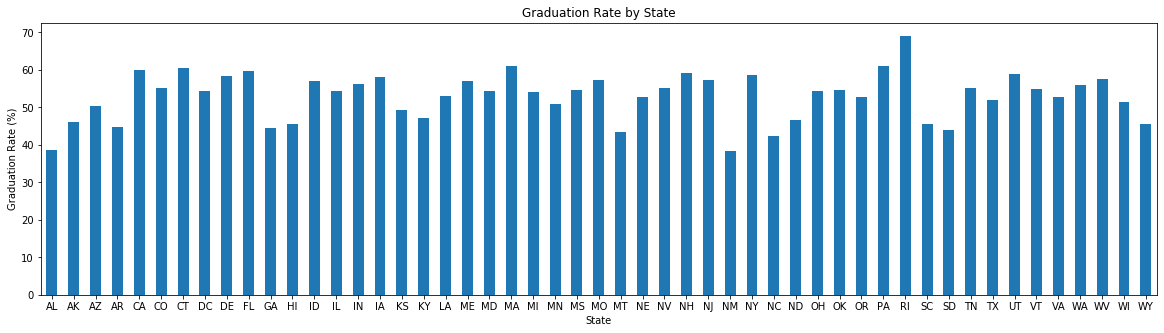

In [151]:
fig, ax = plt.subplots()
x_axis = [x for x in range(len(states_average_acceptance["State"]))]
ax = Avg_Graduation["Graduation Rate"].plot(kind = "bar", figsize = (20,5))
plt.xticks(x_axis, Avg_Graduation["State"], rotation="horizontal")
plt.title("Graduation Rate by State")
ax.set_xlabel("State")
ax.set_ylabel("Graduation Rate (%)")
fig.savefig('Graduation_by_State.png')
plt.show()

In [152]:
# Creating a function scatter and histogram plots
def Plot(p1, p2):
    
    fig, ax = plt.subplots()
    
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(p1)), p1, label=p1.name)
    plt.scatter(range(len(p2)), p2, label=p2.name)
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(p1, 10, density=True, alpha=0.7, label=p1.name)
    plt.hist(p2, 10, density=True, alpha=0.7, label=p2.name)
    plt.axvline(p1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(p2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return plt.show()

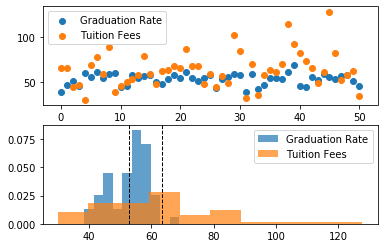

In [153]:
# Creating graduation and tuition fees dataframe
target_table = pd.DataFrame({"State":Avg_Graduation["State"],
                             "Graduation Rate" :Avg_Graduation["Graduation Rate"], 
                             "Tuition Fees" : Avg_Tuition["Tuition & Fees"].tolist()})

# Plotting Graduation Rate vs Tuition

Gr = target_table["Graduation Rate"]
Tu = target_table["Tuition Fees"]/100
  
Plot(Gr, Tu)
#plt.title("Graduation Rate vs. Tuition Fees")
#ax.set_xlabel("Graduation (%)")
#ax.set_ylabel("Tuition Fees ($)")
fig.savefig('Graduation_Tuition.png')

In [154]:
#T-test on Graduation and tuition fees
stats.ttest_ind(Gr, Tu, equal_var=False)

Ttest_indResult(statistic=-3.632738924953407, pvalue=0.0005806882851226509)

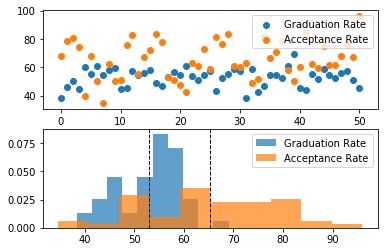

In [155]:
# Plotting Graduation Rate vs Acceptance Rate
Gr = Avg_Graduation["Graduation Rate"]
Ac = Average_Acceptance["Acceptance Rate"]
Plot(Gr,Ac)

fig.savefig('Graduation_Acceptance.png')

In [156]:
#T-test on Graduation and Acceptance Rate
stats.ttest_ind(Gr, Ac, equal_var=False)

Ttest_indResult(statistic=-6.014773010300378, pvalue=6.841825633625919e-08)

In [182]:
#Formatting SAT_ACT df
ACT_SAT = pd.DataFrame(pd.read_csv("data/SAT_ACT.csv"))

ACT_SAT = ACT_SAT.replace('-',0)
ACT_SAT.drop(ACT_SAT.head().columns[[0,1]], axis = 1, inplace = True)
for column in ACT_SAT.columns[2:-1] :
    ACT_SAT[column] = ACT_SAT[column].str.rstrip('(MT only), (CM O, (MTEN').str.replace(',', '').fillna(0).astype('int')
Avg_ACT_SAT = ACT_SAT.groupby('State').mean().reset_index()
#Avg_ACT_SAT["SAT 25% Percentile(x100)"] = round((Avg_ACT_SAT["SAT 25% Percentile"]/100),2)
#Avg_ACT_SAT["SAT 75% Percentile(x100)"] = round((Avg_ACT_SAT["SAT 75% Percentile"]/100),2)
Avg_SAT = Avg_ACT_SAT[["State","SAT 25% Percentile", "SAT 75% Percentile"]]
Avg_ACT = Avg_ACT_SAT[["State","ACT 25% Percentile", "ACT 75% Percentile"]]
Avg_SAT["SAT 25%"] = (Avg_SAT["SAT 25% Percentile"]/(Avg_SAT["SAT 25% Percentile"] + Avg_SAT["SAT 75% Percentile"]))*100
Avg_SAT["SAT 75%"] = (Avg_SAT["SAT 75% Percentile"]/(Avg_SAT["SAT 25% Percentile"] + Avg_SAT["SAT 75% Percentile"]))*100
Avg_ACT.head()

,State,ACT 25% Percentile,ACT 75% Percentile
0,AK,53.000000,75.000000
1,AL,56.521739,77.173913
2,AR,59.000000,77.600000
3,AZ,58.500000,78.000000
4,CA,61.240000,78.586667


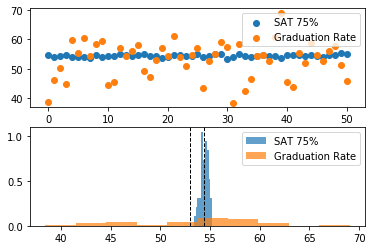

In [181]:
#Plotting ACT Test per state

Act_25 =  Avg_ACT["ACT 25% Percentile"]
Act_75 =  Avg_ACT["ACT 75% Percentile"]
SAT_25 =  Avg_SAT["SAT 25%"]
SAT_75 =  Avg_SAT["SAT 75%"]
#Plot(Act_25, Gr)
Plot(SAT_75, Gr)
# x_axis = [x for x in range(len(Avg_ACT_SAT["State"]))]
# ax = Avg_ACT.plot(kind = "bar", figsize = (20,5))
# plt.xticks(x_axis, Avg_ACT_SAT["State"], rotation="horizontal")
# plt.title("Average ACT Test by State")
# ax.set_xlabel("State")
# ax.set_ylabel("ACT Tests")
# fig.savefig('ACT_per_State.png')

In [183]:
stats.ttest_ind(Gr, SAT_75, equal_var=False)

Ttest_indResult(statistic=-1.6615891429762641, pvalue=0.10280111787662326)